# Continuous Cellular Automaton Analysis
## Investigating Spatiotemporal Chaos in Coupled Map Lattices

This notebook investigates the properties of spatiotemporal chaos in a continuous cellular automaton model.
We examine:
1. Basic behavior and visualization
2. Bifurcation diagrams
3. Synchronization analysis
4. Chaos indicators (Lyapunov exponents)
5. Topology effects

## Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from cellular_automaton import ContinuousCellularAutomaton
from visualization import (
    plot_grid_state, plot_grid_evolution, plot_time_series,
    plot_cell_trajectories, plot_phase_space, create_summary_plot
)
from analysis import (
    bifurcation_diagram, plot_bifurcation_diagram,
    synchronization_analysis, plot_synchronization_analysis,
    lyapunov_spectrum, plot_lyapunov_spectrum,
    power_spectrum_analysis, compare_topologies,
    compute_lyapunov_exponent, compute_synchronization_metrics
)

# Create plots directory if it doesn't exist
PLOTS_DIR = 'plots'
os.makedirs(PLOTS_DIR, exist_ok=True)

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (10, 6)

print("=" * 70)
print("CONTINUOUS CELLULAR AUTOMATON ANALYSIS")
print("Investigating Spatiotemporal Chaos in Coupled Map Lattices")
print("=" * 70)
print(f"\nPlots will be saved to: {PLOTS_DIR}/")
print()

CONTINUOUS CELLULAR AUTOMATON ANALYSIS
Investigating Spatiotemporal Chaos in Coupled Map Lattices

Plots will be saved to: plots/



## 1. Basic Cellular Automaton Behavior

Let's start by running a simple simulation and observing the basic dynamics.
We'll use a 100×100 grid with typical parameters.

In [2]:
print("[1/7] Running basic cellular automaton simulation...")
# Create and run a basic CA
ca_basic = ContinuousCellularAutomaton(
    grid_size=(100, 100),
    r=3.8,           # Growth parameter (chaotic regime)
    epsilon=0.5,     # Coupling strength (moderate)
    boundary='periodic',
    topology='moore',
    seed=42
)

# Run simulation
ca_basic.run(steps=500, record_history=True)
print(f"       Simulation complete! Final grid mean: {np.mean(ca_basic.grid):.3f}")

[1/7] Running basic cellular automaton simulation...
       Simulation complete! Final grid mean: 0.851


### Visualization of Grid Evolution

      Generating grid evolution plot...
       Saved: plots/01_grid_evolution.png


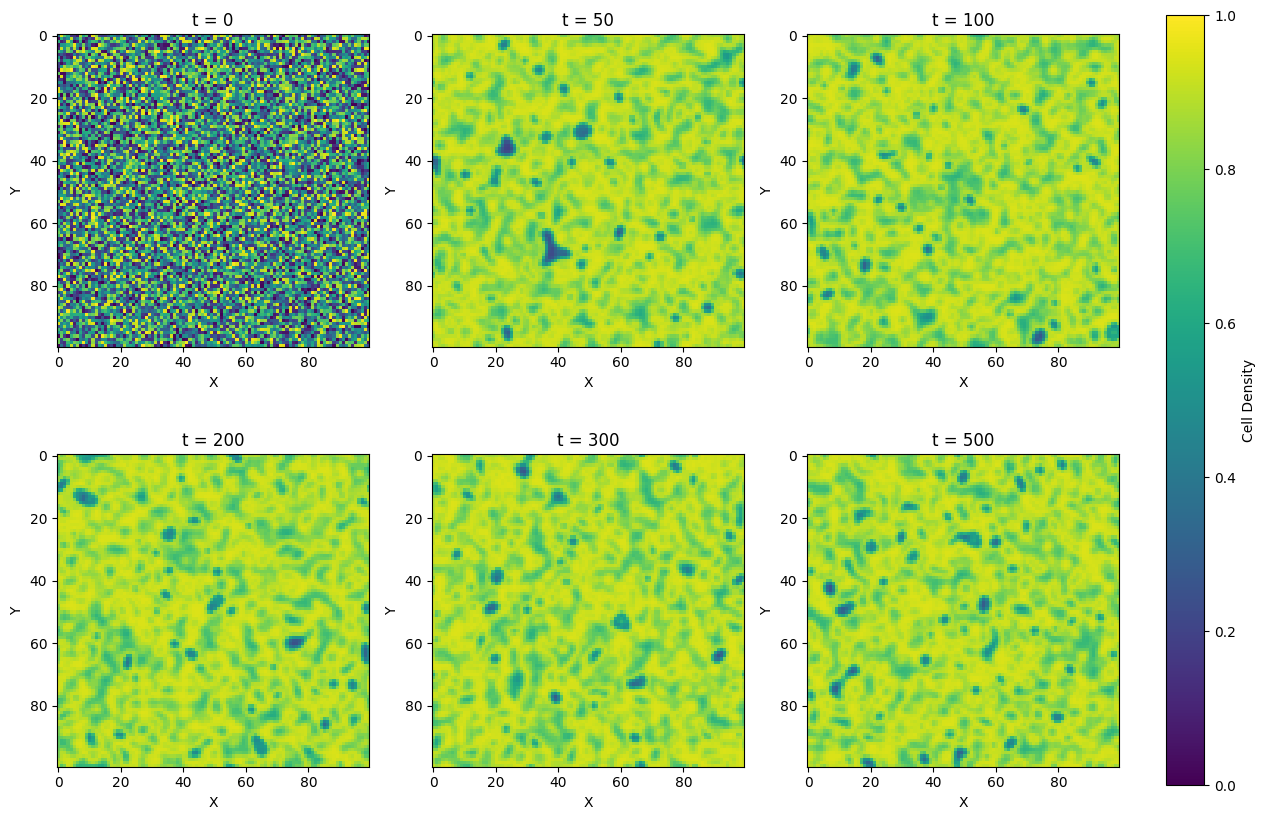

In [3]:
# Plot grid evolution at different timesteps
print("      Generating grid evolution plot...")
fig = plot_grid_evolution(ca_basic, timesteps=[0, 50, 100, 200, 300, 500])
plt.savefig(f'{PLOTS_DIR}/01_grid_evolution.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/01_grid_evolution.png")
plt.show()

### Time Series Analysis

      Generating time series plot...
       Saved: plots/02_time_series.png


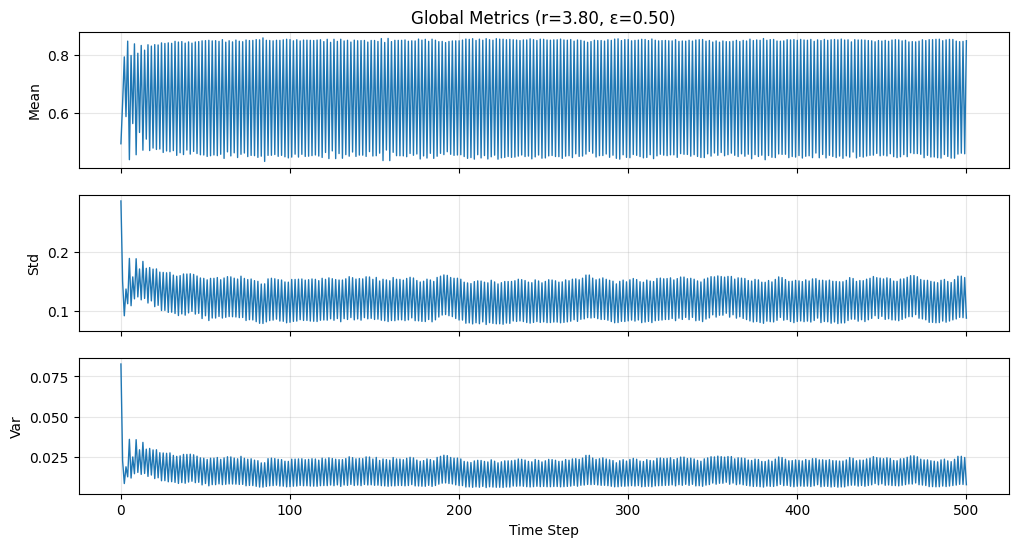

In [4]:
# Plot global metrics over time
print("      Generating time series plot...")
fig = plot_time_series(ca_basic, metrics=['mean', 'std', 'var'])
plt.savefig(f'{PLOTS_DIR}/02_time_series.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/02_time_series.png")
plt.show()

### Individual Cell Trajectories

      Generating cell trajectories plot...
       Saved: plots/03_cell_trajectories.png


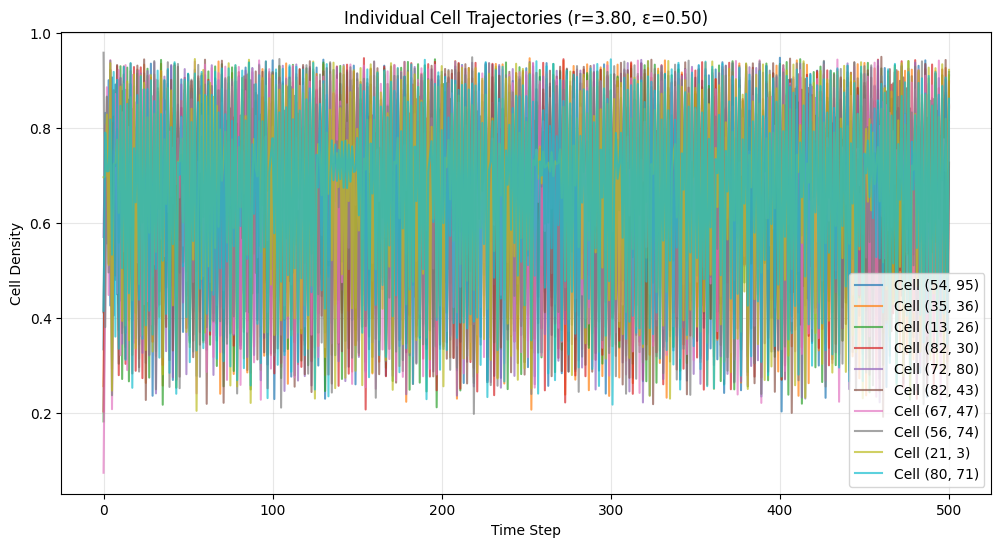

In [5]:
# Plot trajectories of individual cells
print("      Generating cell trajectories plot...")
fig = plot_cell_trajectories(ca_basic, n_cells=10, random_cells=True)
plt.savefig(f'{PLOTS_DIR}/03_cell_trajectories.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/03_cell_trajectories.png")
plt.show()

### Phase Space Diagram

      Generating phase space plot...
       Saved: plots/04_phase_space.png


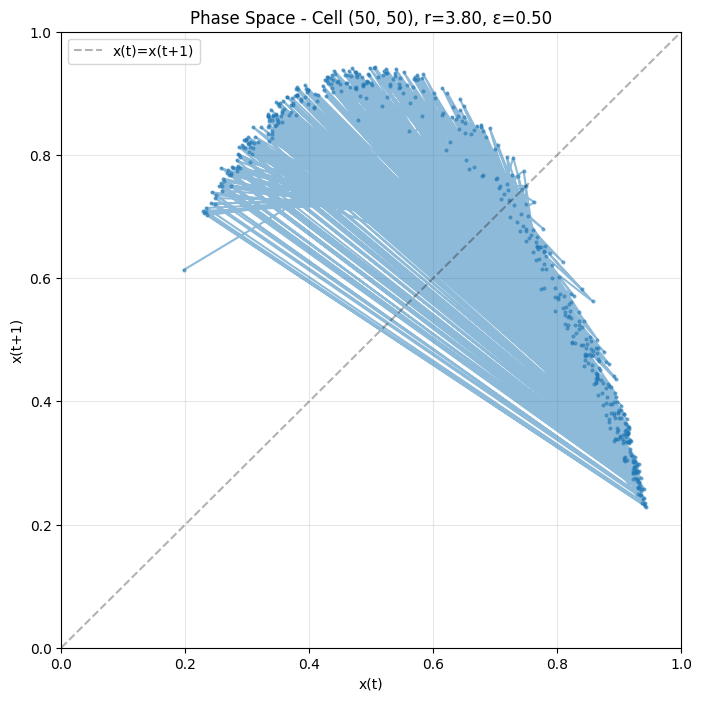

In [6]:
# Plot phase space for center cell
print("      Generating phase space plot...")
fig = plot_phase_space(ca_basic)
plt.savefig(f'{PLOTS_DIR}/04_phase_space.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/04_phase_space.png")
plt.show()

### Comprehensive Summary

      Generating comprehensive summary plot...
       Saved: plots/05_summary.png


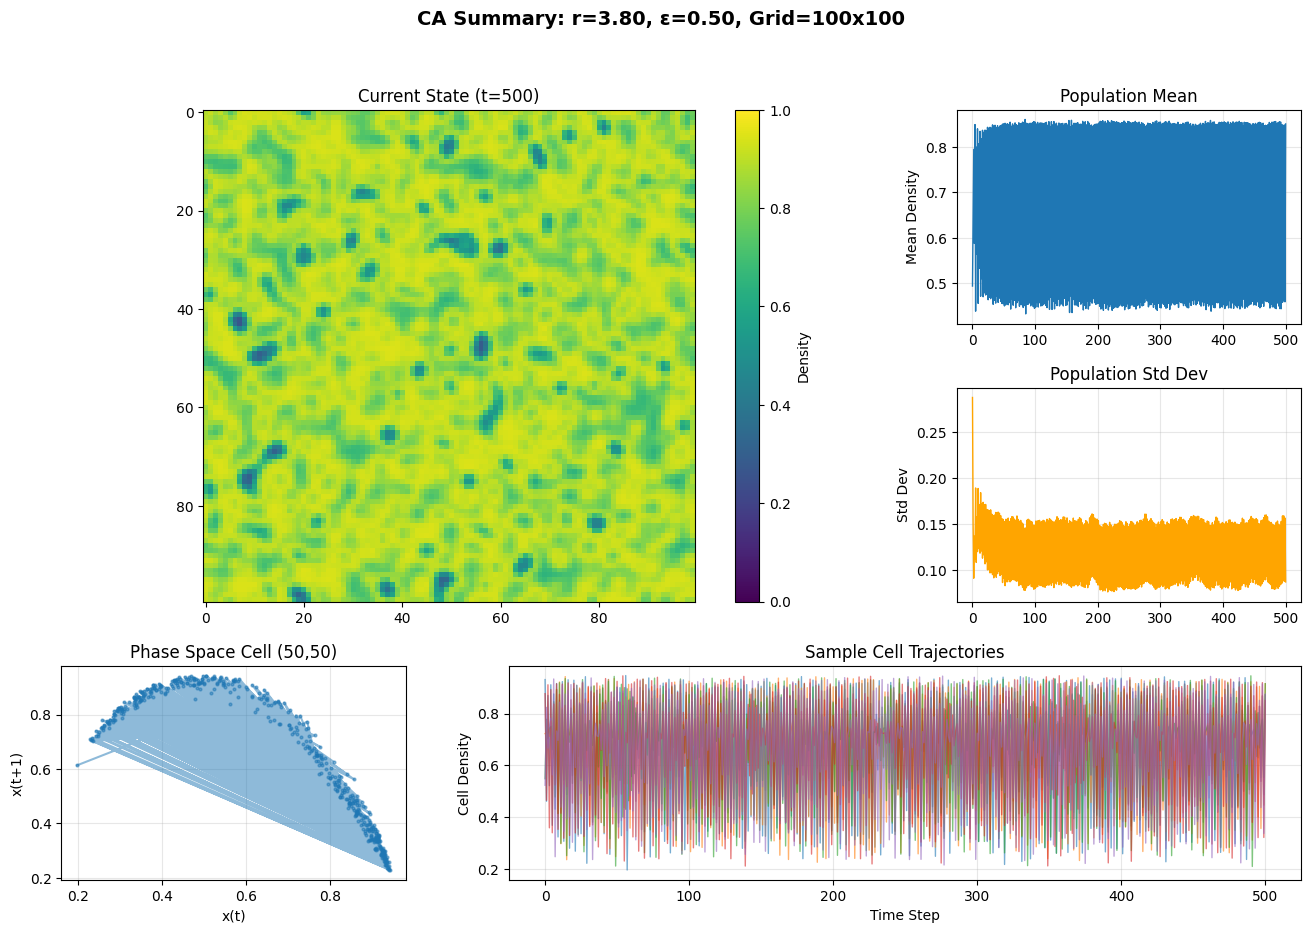

In [7]:
# Create comprehensive summary plot
print("      Generating comprehensive summary plot...")
fig = create_summary_plot(ca_basic)
plt.savefig(f'{PLOTS_DIR}/05_summary.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/05_summary.png")
plt.show()
print()

## 2. Bifurcation Analysis

The bifurcation diagram shows how the system behavior changes with the growth parameter r.
We expect to see:
- Stable fixed points at low r
- Period doubling as r increases
- Chaotic behavior at high r (typically r > 3.57)

### Computing Bifurcation Diagram

**Note:** This computation may take several minutes.

In [9]:
print("[2/7] Computing bifurcation diagram for entire system...")
print("      (This may take several minutes...)")
r_values_bifurc = np.linspace(2.5, 4.0, 150)

# Compute bifurcation using MEAN of entire grid
r_system_list = []
mean_system_list = []

for r in r_values_bifurc:
    print(f"      Computing r = {r:.3f}...", end='\r')

    ca_bifurc = ContinuousCellularAutomaton(
        grid_size=(100, 100),
        r=r,
        epsilon=0.5,
        boundary='periodic',
        topology='moore',
        seed=42
    )

    # Skip transient
    ca_bifurc.run(steps=200, record_history=False)

    # Sample mean density of entire grid
    for _ in range(100):
        ca_bifurc.step()
        r_system_list.append(r)
        mean_system_list.append(np.mean(ca_bifurc.grid))

print("\n       System bifurcation computation complete!")

# Convert to arrays
r_array = np.array(r_system_list)
values_array = np.array(mean_system_list)

[2/7] Computing bifurcation diagram for entire system...
      (This may take several minutes...)
      Computing r = 4.000...
       System bifurcation computation complete!


      Generating system bifurcation diagram plot...
       Saved: plots/06_bifurcation_diagram.png


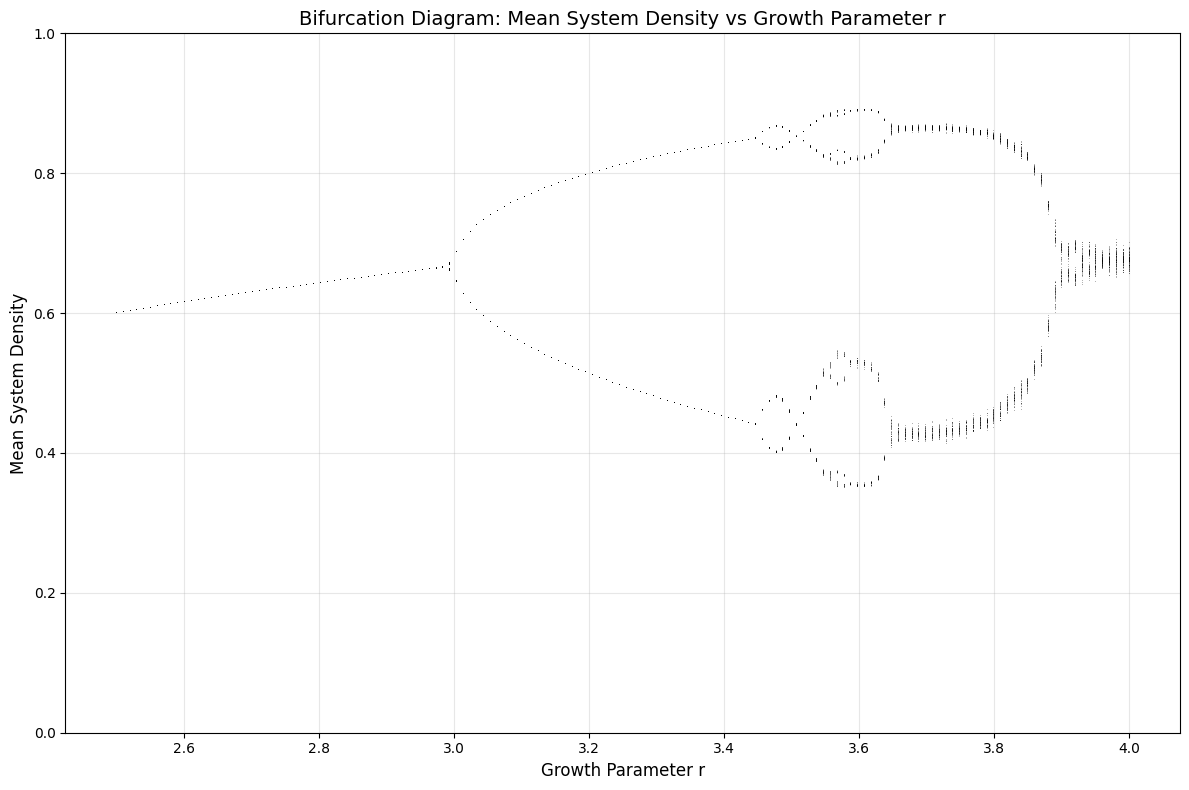

In [10]:
# Plot bifurcation diagram
print("      Generating system bifurcation diagram plot...")
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(r_array, values_array, ',k', alpha=0.3, markersize=0.5)
ax.set_xlabel('Growth Parameter r', fontsize=12)
ax.set_ylabel('Mean System Density', fontsize=12)
ax.set_title('Bifurcation Diagram: Mean System Density vs Growth Parameter r', fontsize=14)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.savefig(f'{PLOTS_DIR}/06_bifurcation_diagram.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/06_bifurcation_diagram.png")
plt.show()

### Single Cell Bifurcation Diagram

Now let's look at the bifurcation behavior of a single specific cell to see
how one automaton responds to changes in the growth parameter r.

      Computing single-cell bifurcation diagram...
      Computing single cell for r = 4.000...
       Single-cell bifurcation computation complete!
      Generating single-cell bifurcation plot...
       Saved: plots/06b_single_cell_bifurcation.png


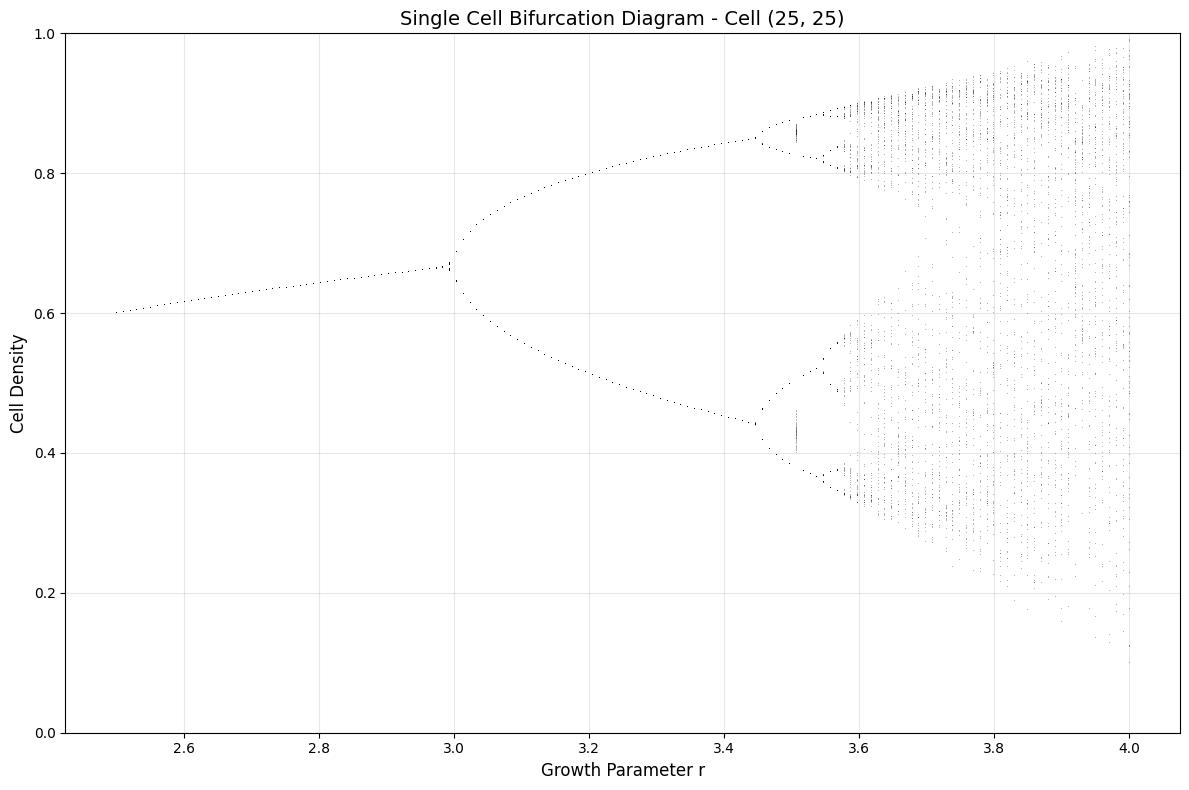

In [12]:
print("      Computing single-cell bifurcation diagram...")
# Select center cell
cell_i, cell_j = 25, 25  # Center of 50x50 grid

r_single_list = []
values_single_list = []

for r in r_values_bifurc:
    print(f"      Computing single cell for r = {r:.3f}...", end='\r')

    ca_single = ContinuousCellularAutomaton(
        grid_size=(100, 100),
        r=r,
        epsilon=0.5,
        boundary='periodic',
        topology='moore',
        seed=42
    )

    # Skip transient
    ca_single.run(steps=200, record_history=False)

    # Sample the specific cell
    for _ in range(100):
        ca_single.step()
        r_single_list.append(r)
        values_single_list.append(ca_single.grid[cell_i, cell_j])

print("\n       Single-cell bifurcation computation complete!")

# Plot single-cell bifurcation
print("      Generating single-cell bifurcation plot...")
fig, ax = plt.subplots(figsize=(12, 8))

r_single_array = np.array(r_single_list)
values_single_array = np.array(values_single_list)

ax.plot(r_single_array, values_single_array, ',k', alpha=0.3, markersize=0.5)
ax.set_xlabel('Growth Parameter r', fontsize=12)
ax.set_ylabel('Cell Density', fontsize=12)
ax.set_title(f'Single Cell Bifurcation Diagram - Cell ({cell_i}, {cell_j})', fontsize=14)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.savefig(f'{PLOTS_DIR}/06b_single_cell_bifurcation.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/06b_single_cell_bifurcation.png")
plt.show()

### Grid Surface Comparison for Different r Values

Visualize the "surface" (spatial patterns) of the model for r ≈ 2, 3.2, and 4.
This shows how spatial patterns differ across dynamical regimes:
- **r = 2.0**: Stable regime (fixed points)
- **r = 3.2**: Period-doubling regime (oscillations)
- **r = 4.0**: Fully chaotic regime

      Generating grid surface comparison for different r values...
      Computing r = 2.0...
      Computing r = 3.2...
      Computing r = 4.0...
       Saved: plots/06c_surface_comparison.png


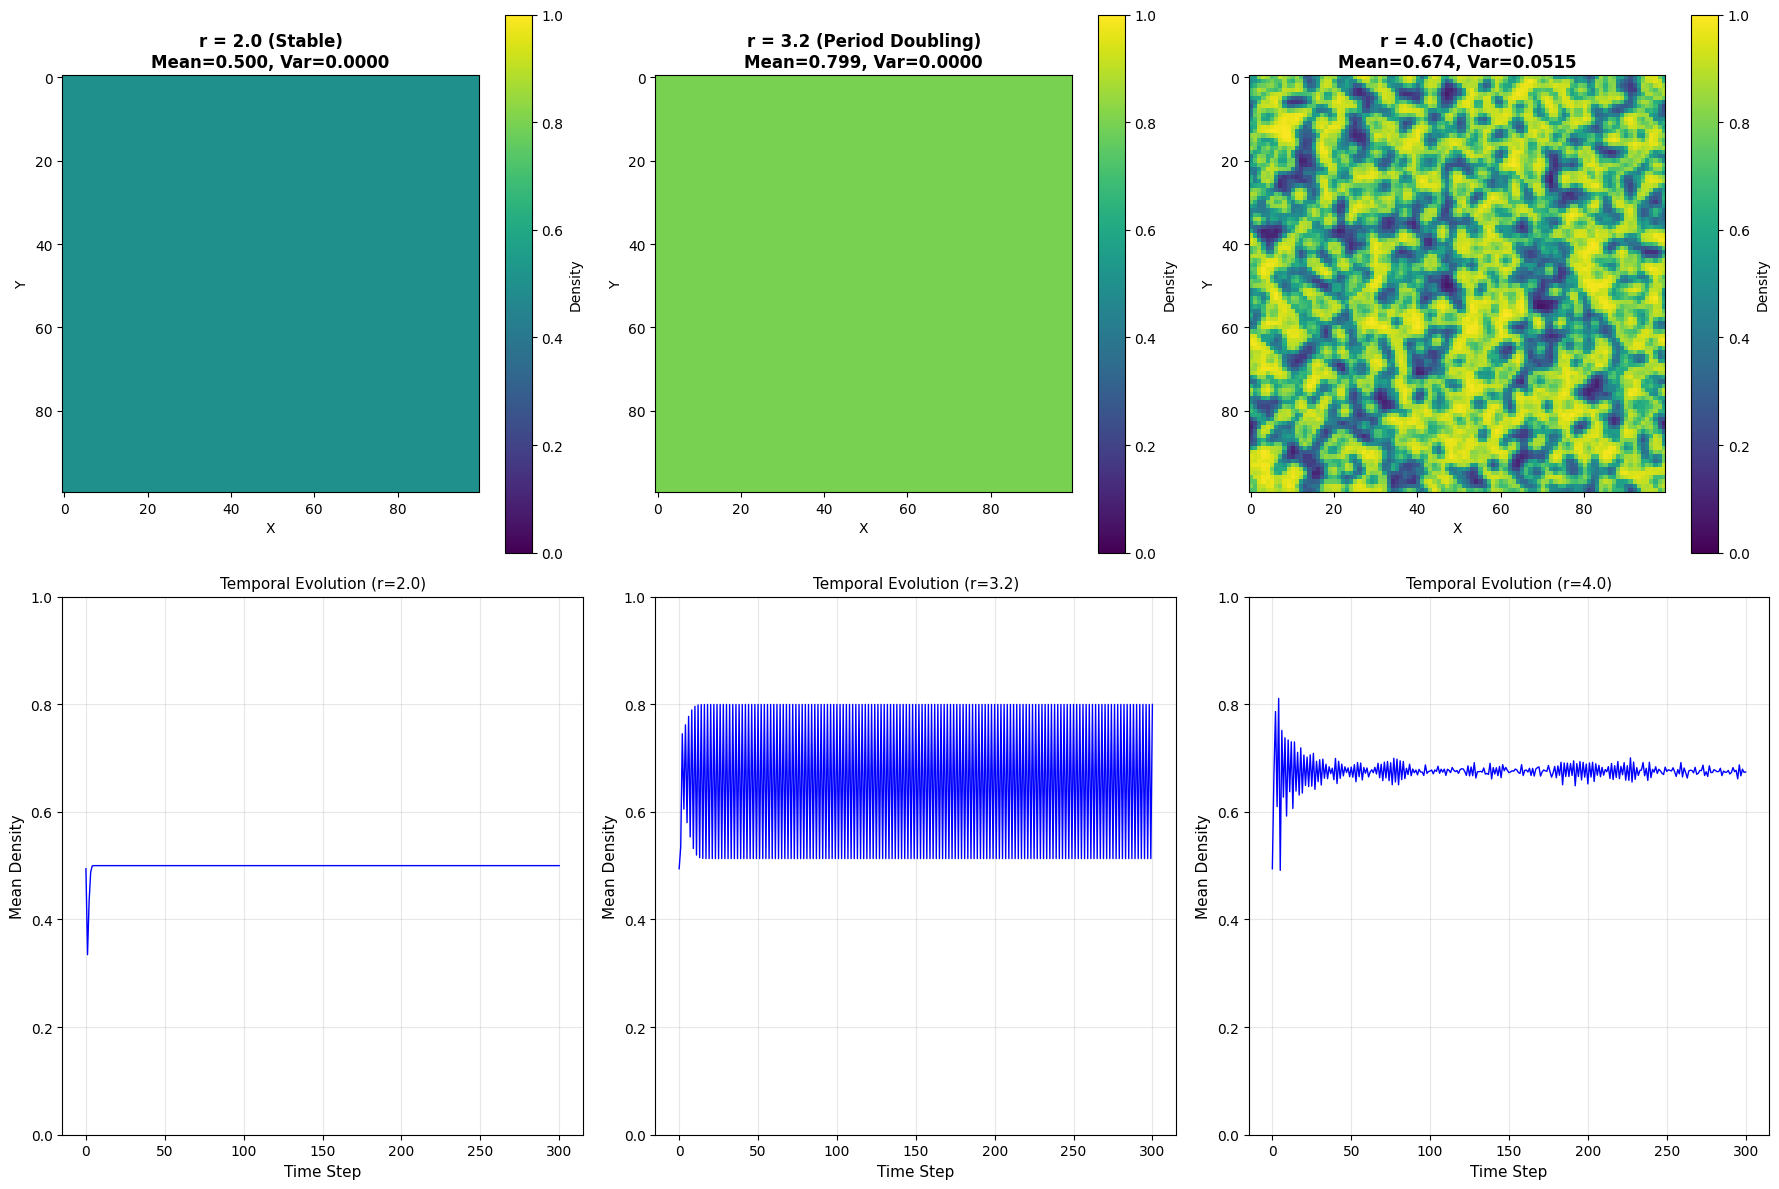

In [13]:
print("      Generating grid surface comparison for different r values...")
r_values_surface = [2.0, 3.2, 4.0]
regime_names = ['Stable', 'Period Doubling', 'Chaotic']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, (r_val, regime) in enumerate(zip(r_values_surface, regime_names)):
    print(f"      Computing r = {r_val}...")

    ca_surface = ContinuousCellularAutomaton(
        grid_size=(100, 100),
        r=r_val,
        epsilon=0.5,
        boundary='periodic',
        topology='moore',
        seed=42
    )

    # Run for sufficient time
    ca_surface.run(steps=300, record_history=True)

    # Get statistics
    mean_val = np.mean(ca_surface.grid)
    std_val = np.std(ca_surface.grid)
    var_val = np.var(ca_surface.grid)

    # Plot final state
    im = axes[0, idx].imshow(ca_surface.grid, cmap='viridis', vmin=0, vmax=1)
    axes[0, idx].set_title(f'r = {r_val} ({regime})\nMean={mean_val:.3f}, Var={var_val:.4f}',
                           fontsize=12, fontweight='bold')
    axes[0, idx].set_xlabel('X')
    axes[0, idx].set_ylabel('Y')
    plt.colorbar(im, ax=axes[0, idx], label='Density')

    # Plot time series of mean density
    mean_series = ca_surface.get_time_series('mean')
    axes[1, idx].plot(mean_series, linewidth=1, color='blue')
    axes[1, idx].set_xlabel('Time Step', fontsize=11)
    axes[1, idx].set_ylabel('Mean Density', fontsize=11)
    axes[1, idx].set_title(f'Temporal Evolution (r={r_val})', fontsize=11)
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].set_ylim(0, 1)

plt.tight_layout()
plt.savefig(f'{PLOTS_DIR}/06c_surface_comparison.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/06c_surface_comparison.png")
plt.show()
print()

### Observations on Bifurcation Analysis

**Expected patterns:**
- **r < 3.0**: Stable fixed points (single attractor)
- **3.0 < r < 3.57**: Period doubling route to chaos
- **r > 3.57**: Chaotic behavior with intermittent windows of periodicity

**Observations from surface comparison:**
- **r = 2.0**: Uniform, stable spatial pattern with low variance
- **r = 3.2**: Moderate spatial structure with periodic oscillations
- **r = 4.0**: Complex, chaotic spatial patterns with high temporal variability

**Questions to consider:**
- At what value of r does chaos emerge?
- Are there periodic windows within the chaotic regime?
- How does spatial coupling affect the bifurcation structure?
- How do spatial patterns differ between stable, periodic, and chaotic regimes?

## 3. Synchronization Analysis

Synchronization measures how coordinated the cells are.
We vary the coupling strength ε from 0 (isolated cells) to 1 (fully coupled).

**Expected behavior:**
- Low ε → cells evolve independently → high spatial variance
- High ε → cells synchronize → low spatial variance

### Computing Synchronization Metrics

In [14]:
print("[3/7] Computing synchronization analysis...")
epsilon_values = np.linspace(0.0, 1.0, 20)

sync_results = synchronization_analysis(
    epsilon_values=epsilon_values,
    r=3.8,
    grid_size=(100, 100),
    steps=300,
    transient=200,
    boundary='periodic',
    topology='moore'
)
print("       Synchronization analysis complete!")

[3/7] Computing synchronization analysis...
Computing ε = 1.000...
Synchronization analysis complete!
       Synchronization analysis complete!


      Generating synchronization analysis plot...
       Saved: plots/07_synchronization_analysis.png


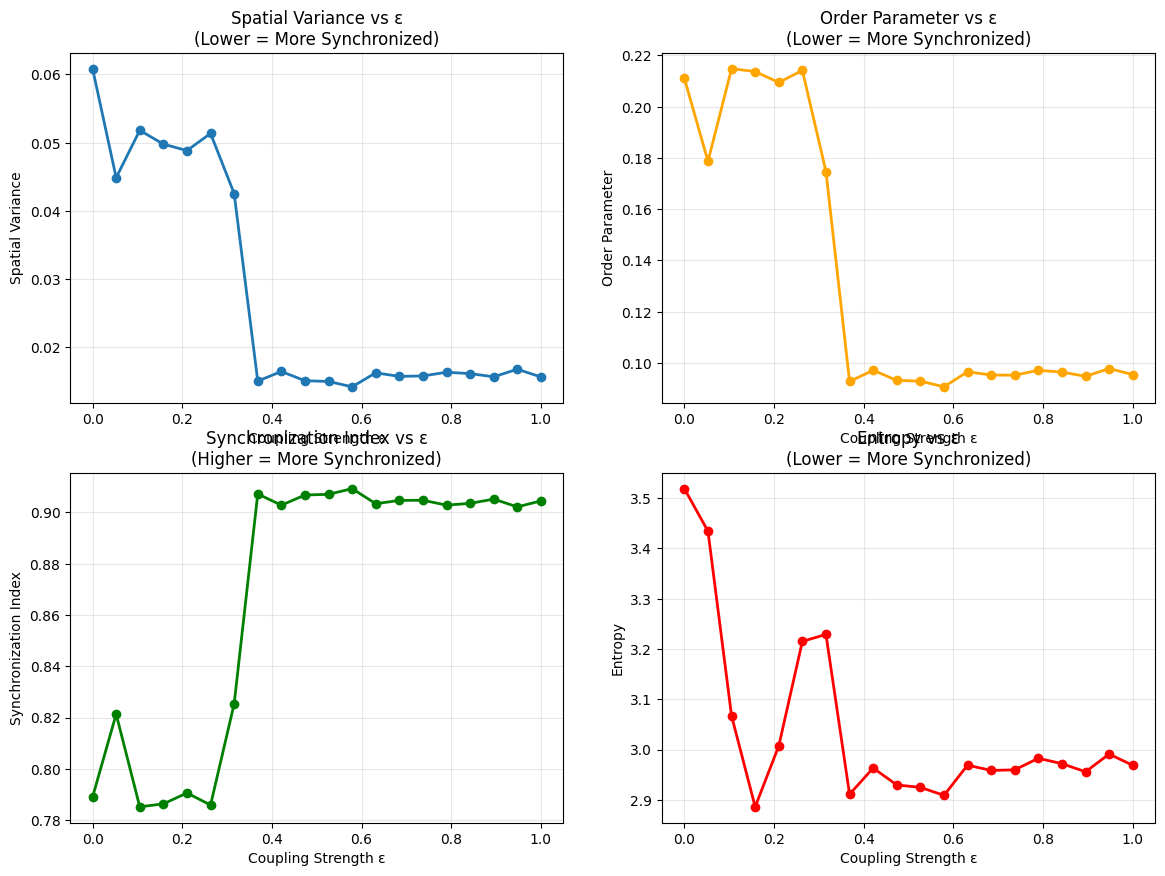

In [15]:
# Plot synchronization results
print("      Generating synchronization analysis plot...")
fig = plot_synchronization_analysis(sync_results)
plt.savefig(f'{PLOTS_DIR}/07_synchronization_analysis.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/07_synchronization_analysis.png")
plt.show()

### Comparing Different Coupling Strengths

      Generating coupling strength comparison...
       Saved: plots/08_coupling_comparison.png


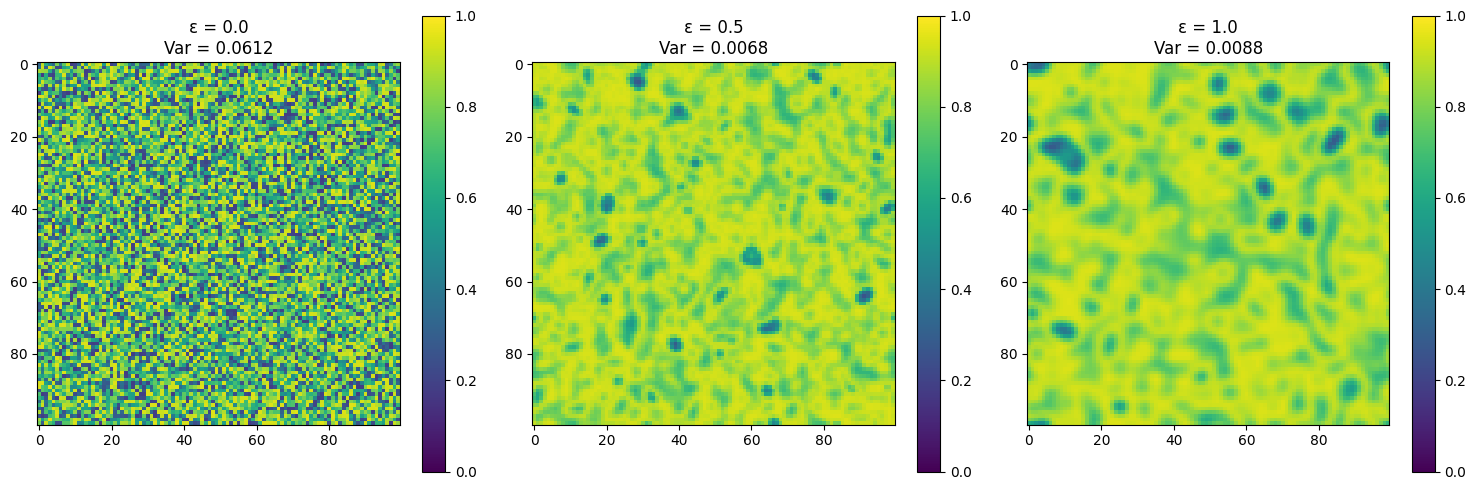

In [16]:
print("      Generating coupling strength comparison...")
# Compare low vs high coupling visually
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, eps in enumerate([0.0, 0.5, 1.0]):
    ca_sync = ContinuousCellularAutomaton(
        grid_size=(100, 100),
        r=3.8,
        epsilon=eps,
        boundary='periodic',
        topology='moore',
        seed=42
    )
    ca_sync.run(steps=300, record_history=False)

    im = axes[idx].imshow(ca_sync.grid, cmap='viridis', vmin=0, vmax=1)
    axes[idx].set_title(f'ε = {eps:.1f}\nVar = {np.var(ca_sync.grid):.4f}')
    plt.colorbar(im, ax=axes[idx])

plt.tight_layout()
plt.savefig(f'{PLOTS_DIR}/08_coupling_comparison.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/08_coupling_comparison.png")
plt.show()
print()

### Observations on Synchronization

**Questions to consider:**
- How does spatial variance change with ε?
- Is there a threshold value of ε where synchronization rapidly increases?
- What is the relationship between synchronization and chaos?

## 4. Chaos Indicators: Lyapunov Exponents

The Lyapunov exponent quantifies sensitivity to initial conditions:
- **λ > 0**: Chaotic behavior (nearby trajectories diverge)
- **λ = 0**: Marginal stability (edge of chaos)
- **λ < 0**: Stable behavior (nearby trajectories converge)

### Computing Lyapunov Spectrum

In [17]:
print("[4/7] Computing Lyapunov spectrum...")
print("      (This may take several minutes...)")
r_values_lyap = np.linspace(2.5, 4.0, 30)

r_lyap, lyap_values = lyapunov_spectrum(
    r_values=r_values_lyap,
    epsilon=0.5,
    grid_size=(100, 100),  # Smaller grid for speed
    steps=500,
    transient=200,
    boundary='periodic',
    topology='moore'
)
print("       Lyapunov spectrum complete!")

[4/7] Computing Lyapunov spectrum...
      (This may take several minutes...)
Computing Lyapunov for r = 4.000...
Lyapunov spectrum complete!
       Lyapunov spectrum complete!


      Generating Lyapunov spectrum plot...
       Saved: plots/09_lyapunov_spectrum.png


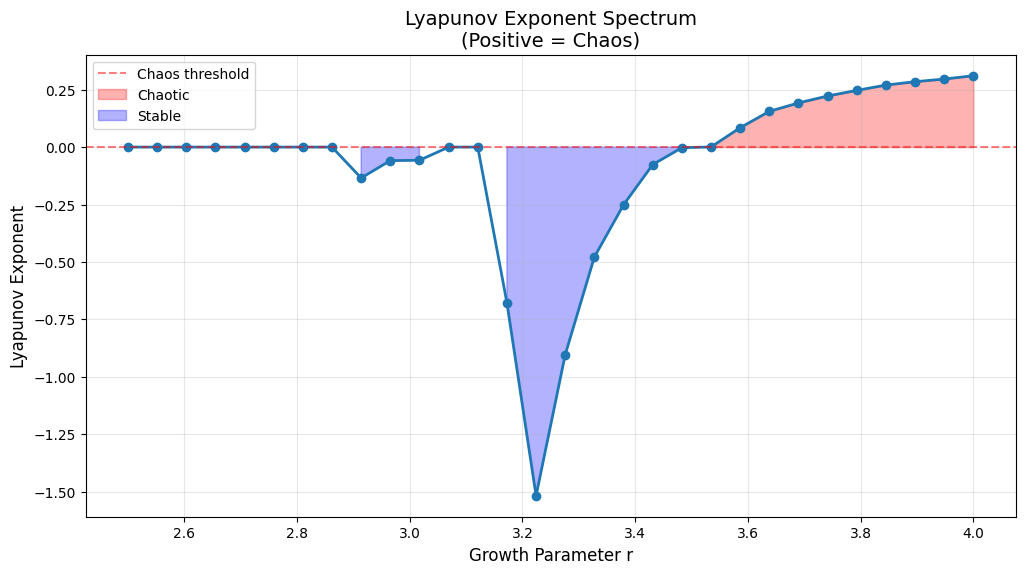

In [18]:
# Plot Lyapunov spectrum
print("      Generating Lyapunov spectrum plot...")
fig = plot_lyapunov_spectrum(r_lyap, lyap_values)
plt.savefig(f'{PLOTS_DIR}/09_lyapunov_spectrum.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/09_lyapunov_spectrum.png")
plt.show()

### Single Point Lyapunov Computation

In [19]:
print("      Computing single-point Lyapunov exponent...")
# Compute Lyapunov for specific parameters
ca_lyap = ContinuousCellularAutomaton(
    grid_size=(100, 100),
    r=3.8,
    epsilon=0.5,
    boundary='periodic',
    topology='moore'
)

lyap_value = compute_lyapunov_exponent(ca_lyap, steps=1000, transient=200)
print(f"      Lyapunov exponent (r=3.8, ε=0.5): λ = {lyap_value:.6f}")

if lyap_value > 0:
    print("       System is CHAOTIC (λ > 0)")
elif lyap_value < 0:
    print("       System is STABLE (λ < 0)")
else:
    print("       System is at EDGE OF CHAOS (λ ≈ 0)")

# Save Lyapunov value to file
with open(f'{PLOTS_DIR}/lyapunov_value.txt', 'w') as f:
    f.write(f"Lyapunov Exponent Analysis\n")
    f.write(f"=" * 50 + "\n\n")
    f.write(f"Parameters:\n")
    f.write(f"  r (growth parameter) = 3.8\n")
    f.write(f"  ε (coupling strength) = 0.5\n")
    f.write(f"  Grid size = 50×50\n")
    f.write(f"  Steps = 1000 (transient = 200)\n\n")
    f.write(f"Result:\n")
    f.write(f"  λ = {lyap_value:.6f}\n\n")
    if lyap_value > 0:
        f.write(f"Interpretation: CHAOTIC (λ > 0)\n")
        f.write(f"The system exhibits sensitive dependence on initial conditions.\n")
    elif lyap_value < 0:
        f.write(f"Interpretation: STABLE (λ < 0)\n")
    else:
        f.write(f"Interpretation: EDGE OF CHAOS (λ ≈ 0)\n")

print(f"       Saved: {PLOTS_DIR}/lyapunov_value.txt")
print()

      Computing single-point Lyapunov exponent...
      Lyapunov exponent (r=3.8, ε=0.5): λ = 0.236142
       System is CHAOTIC (λ > 0)
       Saved: plots/lyapunov_value.txt



### Observations on Lyapunov Exponents

**Questions to consider:**
- At what value of r does the Lyapunov exponent become positive?
- How does this compare with the bifurcation diagram?
- How does coupling strength ε affect the Lyapunov exponent?

## 5. Topology Effects

We compare different network topologies:
- **Moore**: 8 neighbors (diagonals included)
- **Von Neumann**: 4 neighbors (no diagonals)
- **Random-8**: 8 randomly selected neighbors
- **Random-16**: 16 randomly selected neighbors

### Comparing Regular vs Random Topologies

[5/7] Comparing network topologies...
Running Moore (8) topology...
Running Von Neumann (4) topology...
Running Random (8) topology...
Running Random (16) topology...
       Saved: plots/10_topology_comparison.png


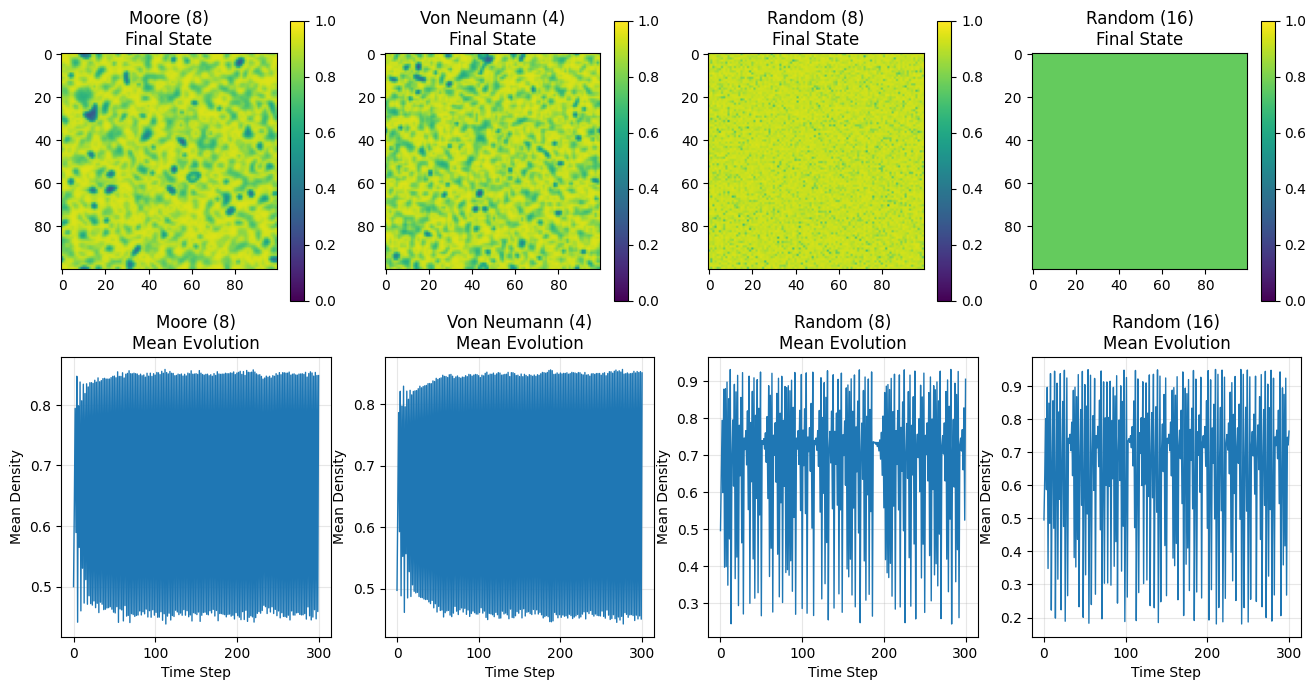

In [20]:
print("[5/7] Comparing network topologies...")
# Define topologies to compare
topologies = [
    {'name': 'Moore (8)', 'topology': 'moore', 'random_neighbors': False},
    {'name': 'Von Neumann (4)', 'topology': 'vonneumann', 'random_neighbors': False},
    {'name': 'Random (8)', 'topology': 'moore', 'random_neighbors': True, 'n_neighbors': 8},
    {'name': 'Random (16)', 'topology': 'moore', 'random_neighbors': True, 'n_neighbors': 16},
]

# Compare topologies
fig = compare_topologies(
    topologies=topologies,
    r=3.8,
    epsilon=0.5,
    grid_size=(100, 100),
    steps=300,
    figsize=(16, 8)
)
plt.savefig(f'{PLOTS_DIR}/10_topology_comparison.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/10_topology_comparison.png")
plt.show()

### Synchronization vs Topology

      Computing synchronization metrics for different topologies...
       Saved: plots/11_topology_synchronization.png


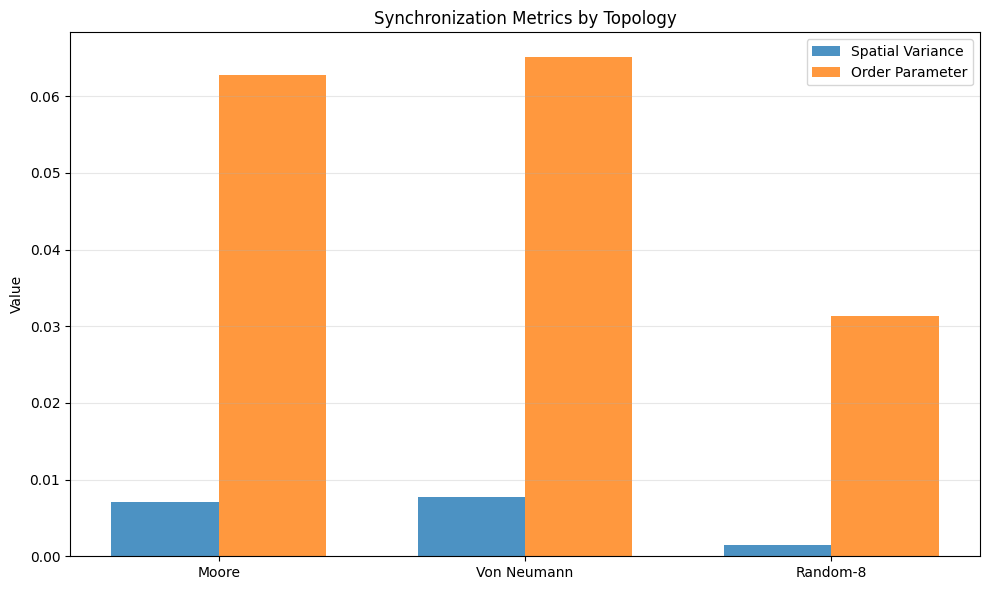

In [21]:
print("      Computing synchronization metrics for different topologies...")
topo_sync_results = {}

for topo_config in [
    {'name': 'Moore', 'topology': 'moore', 'random_neighbors': False},
    {'name': 'Von Neumann', 'topology': 'vonneumann', 'random_neighbors': False},
    {'name': 'Random-8', 'topology': 'moore', 'random_neighbors': True, 'n_neighbors': 8},
]:
    name = topo_config['name']

    ca_topo = ContinuousCellularAutomaton(
        grid_size=(100, 100),
        r=3.8,
        epsilon=0.5,
        boundary='periodic',
        **{k: v for k, v in topo_config.items() if k != 'name'}
    )

    ca_topo.run(steps=500, record_history=False)
    metrics = compute_synchronization_metrics(ca_topo)
    topo_sync_results[name] = metrics

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))
names = list(topo_sync_results.keys())
variances = [topo_sync_results[name]['spatial_variance'] for name in names]
orders = [topo_sync_results[name]['order_parameter'] for name in names]

x = np.arange(len(names))
width = 0.35

ax.bar(x - width/2, variances, width, label='Spatial Variance', alpha=0.8)
ax.bar(x + width/2, orders, width, label='Order Parameter', alpha=0.8)

ax.set_ylabel('Value')
ax.set_title('Synchronization Metrics by Topology')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(f'{PLOTS_DIR}/11_topology_synchronization.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/11_topology_synchronization.png")
plt.show()
print()

### Observations on Topology Effects

**Questions to consider:**
- How does the number of neighbors affect pattern formation?
- Do random connections lead to more or less synchronization?
- How does topology affect the onset of chaos?

## 6. Parameter Space Exploration

Let's explore the 2D parameter space (r, ε) to understand their combined effects.

### 2D Parameter Sweep

In [22]:
print("[6/7] Computing parameter space map...")
r_values_2d = np.linspace(2.8, 4.0, 20)
epsilon_values_2d = np.linspace(0.0, 1.0, 20)

# Store mean Lyapunov exponents
lyap_map = np.zeros((len(epsilon_values_2d), len(r_values_2d)))

for i, eps in enumerate(epsilon_values_2d):
    for j, r in enumerate(r_values_2d):
        print(f"      Computing r={r:.2f}, ε={eps:.2f}...", end='\r')

        ca_param = ContinuousCellularAutomaton(
            grid_size=(100, 100),
            r=r,
            epsilon=eps,
            boundary='periodic',
            topology='moore'
        )

        # Simple metric: variance of final state
        ca_param.run(steps=300, record_history=False)
        lyap_map[i, j] = np.var(ca_param.grid)

print("      " + " " * 50)  # Clear progress line
print("       Parameter space computation complete!")

[6/7] Computing parameter space map...
                                                        
       Parameter space computation complete!


      Generating parameter space plot...
       Saved: plots/12_parameter_space.png


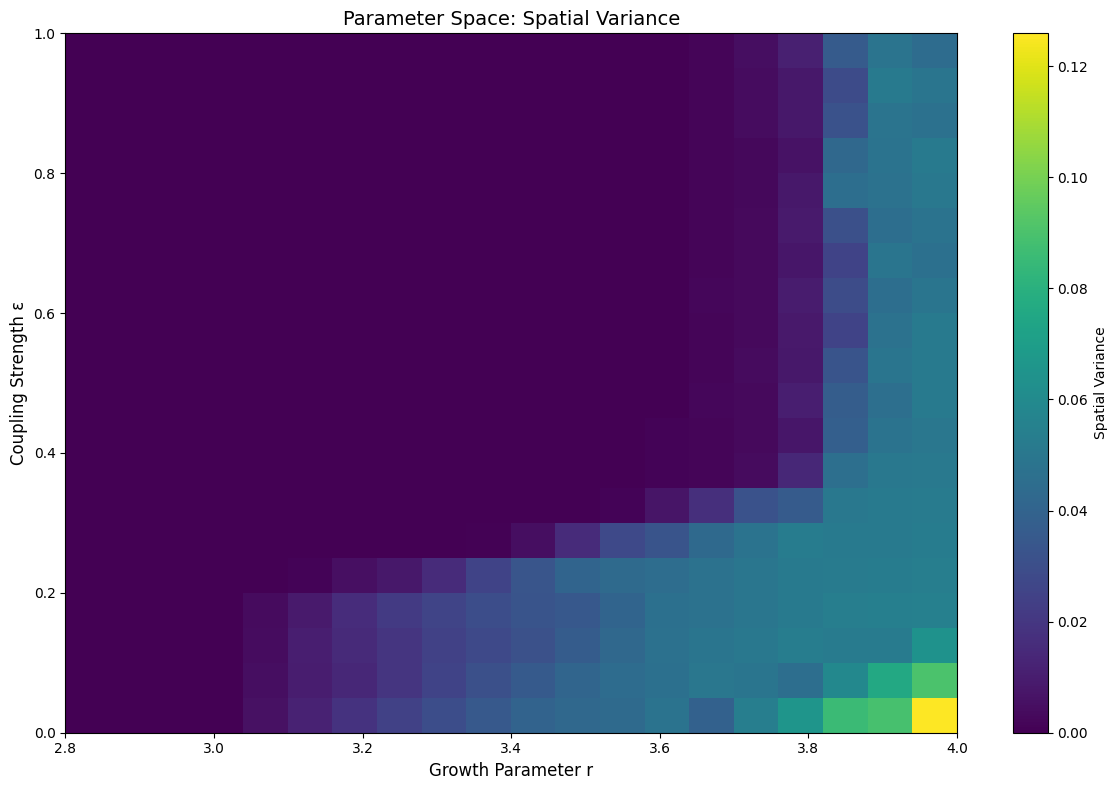

In [23]:
# Plot parameter space
print("      Generating parameter space plot...")
fig, ax = plt.subplots(figsize=(12, 8))

im = ax.imshow(
    lyap_map,
    aspect='auto',
    origin='lower',
    extent=[r_values_2d[0], r_values_2d[-1], epsilon_values_2d[0], epsilon_values_2d[-1]],
    cmap='viridis'
)

ax.set_xlabel('Growth Parameter r', fontsize=12)
ax.set_ylabel('Coupling Strength ε', fontsize=12)
ax.set_title('Parameter Space: Spatial Variance', fontsize=14)
plt.colorbar(im, ax=ax, label='Spatial Variance')

plt.tight_layout()
plt.savefig(f'{PLOTS_DIR}/12_parameter_space.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/12_parameter_space.png")
plt.show()
print()

## 7. Power Spectrum Analysis

Frequency analysis can reveal periodic components in the dynamics.

[7/7] Computing power spectrum analysis...
       Saved: plots/13_power_spectrum.png


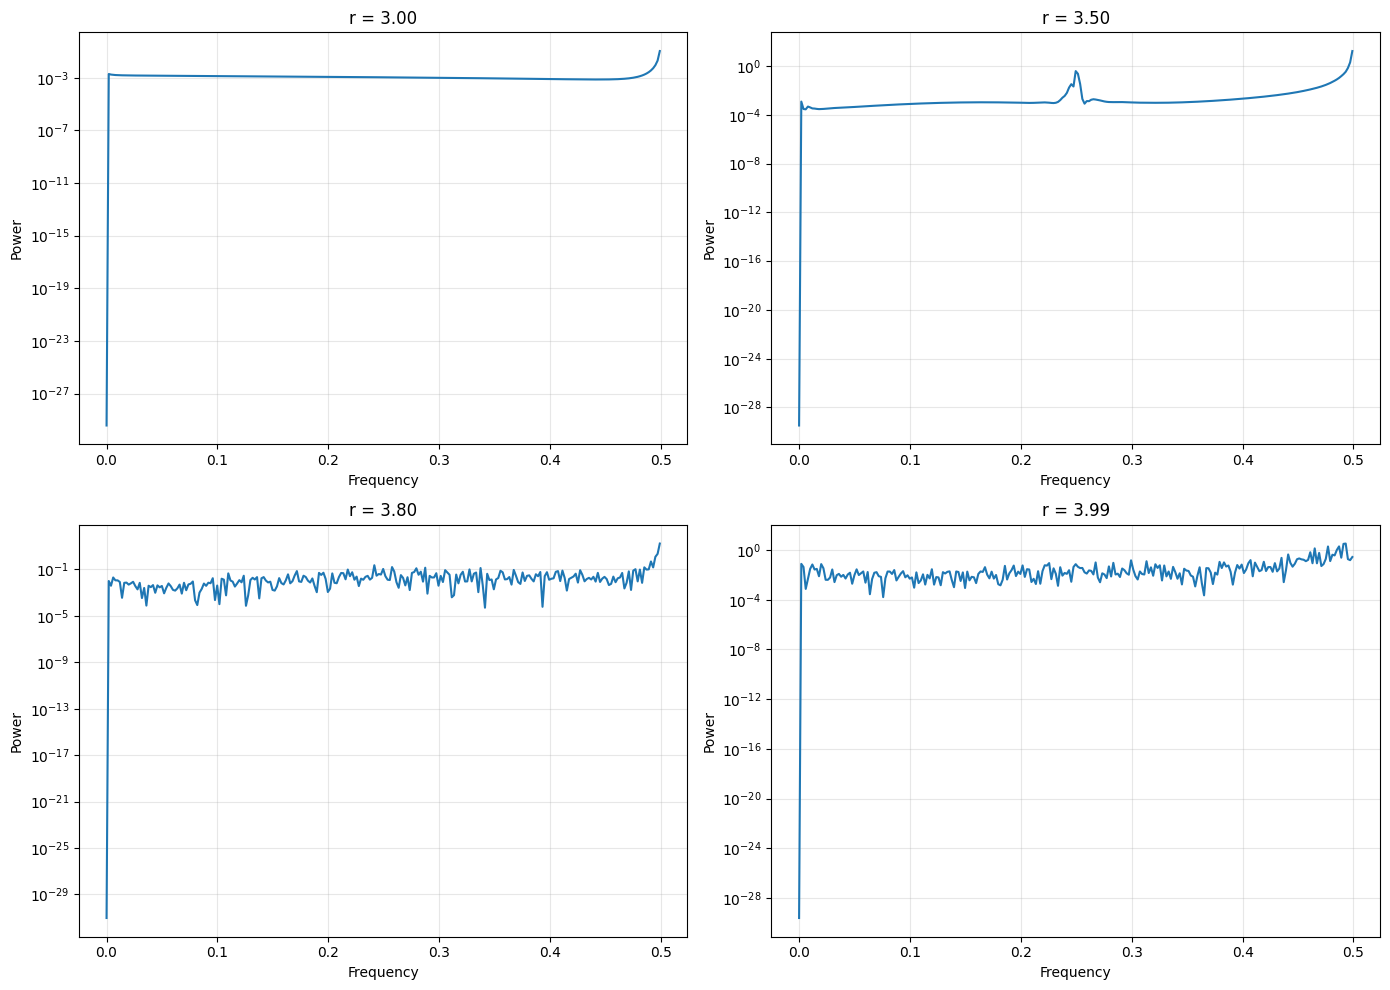

In [24]:
print("[7/7] Computing power spectrum analysis...")
# Power spectrum for different r values
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

r_values_spectrum = [3.0, 3.5, 3.8, 3.99]

for idx, r in enumerate(r_values_spectrum):
    ca_spectrum = ContinuousCellularAutomaton(
        grid_size=(100, 100),
        r=r,
        epsilon=0.5,
        boundary='periodic',
        topology='moore',
        seed=42
    )

    ca_spectrum.run(steps=500, record_history=True)

    # Get center cell trajectory
    i, j = 50, 50
    trajectory = ca_spectrum.get_cell_trajectory(i, j)

    # Compute power spectrum
    from scipy import signal
    freqs, psd = signal.periodogram(trajectory)

    axes[idx].semilogy(freqs, psd)
    axes[idx].set_xlabel('Frequency')
    axes[idx].set_ylabel('Power')
    axes[idx].set_title(f'r = {r:.2f}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{PLOTS_DIR}/13_power_spectrum.png', bbox_inches='tight')
print(f"       Saved: {PLOTS_DIR}/13_power_spectrum.png")
plt.show()
print()

## Summary

All plots have been saved to the plots/ directory.

In [25]:
print("=" * 70)
print("ANALYSIS COMPLETE!")
print("=" * 70)
print()
print("All plots have been saved to the following location:")
print(f"  {PLOTS_DIR}/")
print()
print("Generated plots:")
print("  01_grid_evolution.png          - Grid states at different timesteps")
print("  02_time_series.png             - Global metrics over time")
print("  03_cell_trajectories.png       - Individual cell dynamics")
print("  04_phase_space.png             - Phase space diagram x(t) vs x(t+1)")
print("  05_summary.png                 - Comprehensive summary view")
print("  06_bifurcation_diagram.png     - Bifurcation analysis (all cells)")
print("  06b_single_cell_bifurcation.png - Single cell bifurcation diagram")
print("  06c_surface_comparison.png     - Grid surfaces for r=2.0, 3.2, 4.0")
print("  07_synchronization_analysis.png - Synchronization vs coupling strength")
print("  08_coupling_comparison.png     - Visual comparison of coupling levels")
print("  09_lyapunov_spectrum.png       - Lyapunov exponents vs r")
print("  10_topology_comparison.png     - Different network topologies")
print("  11_topology_synchronization.png - Synchronization by topology")
print("  12_parameter_space.png         - 2D parameter space (r, ε)")
print("  13_power_spectrum.png          - Frequency analysis")
print()
print("Additional files:")
print("  lyapunov_value.txt             - Detailed Lyapunov exponent results")
print()
print("=" * 70)

ANALYSIS COMPLETE!

All plots have been saved to the following location:
  plots/

Generated plots:
  01_grid_evolution.png          - Grid states at different timesteps
  02_time_series.png             - Global metrics over time
  03_cell_trajectories.png       - Individual cell dynamics
  04_phase_space.png             - Phase space diagram x(t) vs x(t+1)
  05_summary.png                 - Comprehensive summary view
  06_bifurcation_diagram.png     - Bifurcation analysis (all cells)
  06b_single_cell_bifurcation.png - Single cell bifurcation diagram
  06c_surface_comparison.png     - Grid surfaces for r=2.0, 3.2, 4.0
  07_synchronization_analysis.png - Synchronization vs coupling strength
  08_coupling_comparison.png     - Visual comparison of coupling levels
  09_lyapunov_spectrum.png       - Lyapunov exponents vs r
  10_topology_comparison.png     - Different network topologies
  11_topology_synchronization.png - Synchronization by topology
  12_parameter_space.png         - 2D par